# **Stroke Prediction**

### **Installing Libraries**

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### **Importing the Dataset**

In [97]:
df = pd.read_csv('Dataset/stroke-dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### **Data Correlation**

In [126]:
df.corr()

C:\Users\Nitya\AppData\Local\Temp\ipykernel_16364\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.006752,0.007019,0.001654,-0.124618,-0.000022,-0.005622
age,0.006752,1.000000,0.263599,0.246281,-0.037536,0.453607,0.231770
hypertension,0.007019,0.263599,1.000000,0.096957,-0.006830,0.150434,0.125695
heart_disease,0.001654,0.246281,0.096957,1.000000,0.004078,0.087534,0.098813
avg_glucose_level,-0.124618,-0.037536,-0.006830,0.004078,1.000000,-0.008149,-0.008310
bmi,-0.000022,0.453607,0.150434,0.087534,-0.008149,1.000000,0.067616
stroke,-0.005622,0.231770,0.125695,0.098813,-0.008310,0.067616,1.000000


C:\Users\Nitya\AppData\Local\Temp\ipykernel_16364\39248874.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

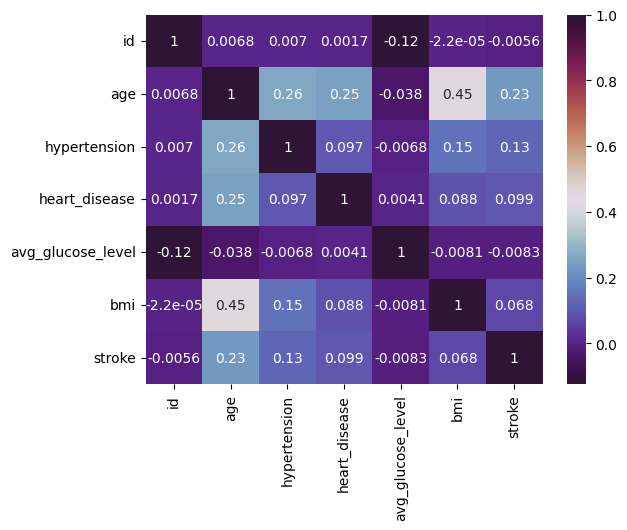

In [127]:
sns.heatmap(df.corr(), annot=True, cmap='twilight_shifted')

### **Data Preprocessing**

#### Determining Empty Values

In [98]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Replacing Empty Values with Rolling Average - BMI

In [99]:
# Finding the rolling average of the BMI
df['Rolling Avg - BMI'] = df['bmi'].rolling(window = 5, min_periods = 1).mean()

# Filling the rows with empty BMI values with the rolling average
df['bmi'] = df['bmi'].fillna(df['Rolling Avg - BMI'])

# Droping the Rolling Average column made - Purpose has been served
df.drop(['Rolling Avg - BMI'], axis = 1, inplace = True)

# Checking whether an NaN exist within the DataFrame
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **Handling Outliers**

#### Visualize Analysis

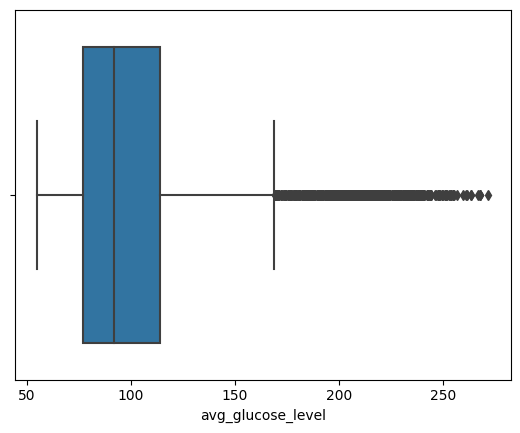

In [100]:
# Average Glucose Level
sns.boxplot(x = df['avg_glucose_level'])
plt.show()

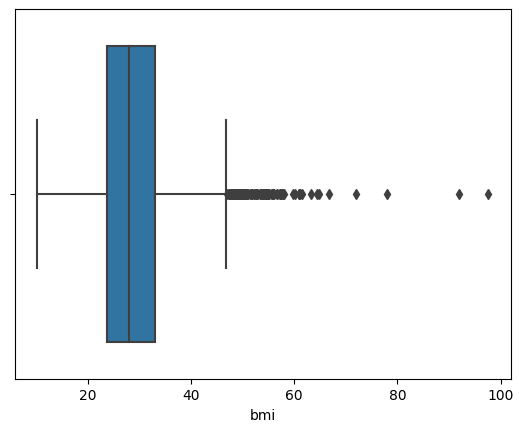

In [101]:
# BMI
sns.boxplot(x = df['bmi'])
plt.show()

#### Numerical Analysis

In [102]:
df[['avg_glucose_level', 'bmi']].describe()

,avg_glucose_level,bmi
count,5110.000000,5110.000000
mean,106.147677,28.910943
std,45.283560,7.733759
min,55.120000,10.300000
25%,77.245000,23.700000
50%,91.885000,28.100000
75%,114.090000,33.000000
max,271.740000,97.600000


#### Calculating the Outliers

In [103]:
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)

Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)

IQR_glucose = Q3_glucose - Q1_glucose
IQR_bmi = Q3_bmi - Q1_bmi

In [104]:
lower_lim_glucose = Q1_glucose - (1.5 * IQR_glucose)
upper_lim_glucose = Q1_glucose + (1.5 * IQR_glucose)

lower_lim_bmi = Q1_bmi - (1.5 * IQR_bmi)
upper_lim_bmi = Q1_bmi + (1.5 * IQR_bmi)

#### Dropping the Rows with Outliers

In [105]:
outlier_glucose_low = (df['avg_glucose_level'] < lower_lim_glucose)
outlier_glucose_high = (df['avg_glucose_level'] > upper_lim_glucose)

outlier_bmi_low = (df['bmi'] < lower_lim_bmi)
outlier_bmi_high = (df['bmi'] > upper_lim_bmi)

In [106]:
df = df[~(outlier_glucose_low | outlier_glucose_high)]
df = df[~(outlier_bmi_low | outlier_bmi_high)]

df

C:\Users\Nitya\AppData\Local\Temp\ipykernel_16364\445729408.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,25.800,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700,never smoked,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.600,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,27.925,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600,never smoked,0


#### Visual Analysis After Dropping the Outliers

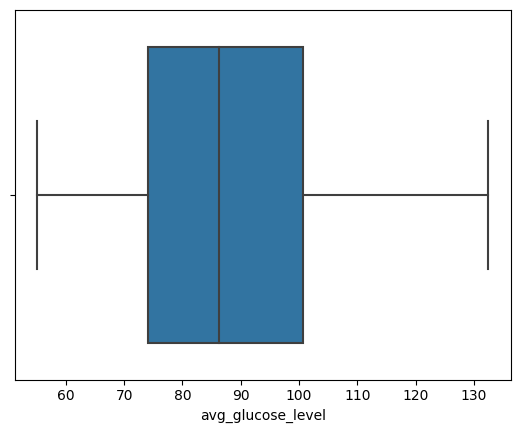

In [107]:
# Average Glucose Level
sns.boxplot(x = df['avg_glucose_level'])
plt.show()

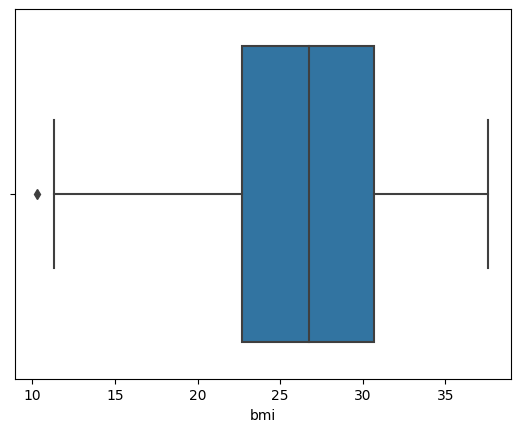

In [108]:
# BMI
sns.boxplot(x = df['bmi'])
plt.show()

### **One Hot Encoding the Columns with Categorical Data**

#### Gender

In [109]:
ohe_gender = pd.get_dummies(df.gender, prefix='gender')
ohe_gender

,gender_Female,gender_Male
2,0,1
6,0,1
7,1,0
8,1,0
9,1,0
...,...,...
5102,1,0
5104,1,0
5105,1,0
5107,1,0


#### Marriage

In [110]:
ohe_ever_married = pd.get_dummies(df.ever_married, prefix='ever_married')
ohe_ever_married

,ever_married_No,ever_married_Yes
2,0,1
6,0,1
7,1,0
8,0,1
9,0,1
...,...,...
5102,0,1
5104,1,0
5105,0,1
5107,0,1


#### Work Type

In [111]:
ohe_work_type = pd.get_dummies(df.work_type, prefix='work_type')
ohe_work_type

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0
...,...,...,...,...,...
5102,0,0,1,0,0
5104,0,0,0,0,1
5105,0,0,1,0,0
5107,0,0,0,1,0


#### Residence

In [112]:
ohe_residence = pd.get_dummies(df.Residence_type, prefix='Residence_type')
ohe_residence

,Residence_type_Rural,Residence_type_Urban
2,1,0
6,1,0
7,0,1
8,1,0
9,0,1
...,...,...
5102,1,0
5104,1,0
5105,0,1
5107,1,0


#### Smoking

In [113]:
ohe_smoking = pd.get_dummies(df.smoking_status, prefix='smoking_status')
ohe_smoking

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0
...,...,...,...,...
5102,0,0,1,0
5104,1,0,0,0
5105,0,0,1,0
5107,0,0,1,0


### **Split Dataset into Independent & Dependent Variables**

In [114]:
frames = [df['id'], ohe_gender, df['age'], df['hypertension'], df['heart_disease'], ohe_ever_married, ohe_work_type, ohe_residence, df['avg_glucose_level'], df['bmi'], ohe_smoking]

X = pd.concat(frames, axis = 1, join = 'inner')
y = df['stroke']

### **Splitting X and y into Train and Test Datasets**

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

### **Checking the Training Datasets**

In [116]:
X_train

,id,gender_Female,gender_Male,age,hypertension,heart_disease,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3437,33115,0,1,32.0,0,0,0,1,0,0,...,0,0,1,0,82.68,29.2,0,0,1,0
798,46683,1,0,25.0,0,0,1,0,0,0,...,0,0,0,1,122.01,27.0,0,0,0,1
1729,51660,1,0,69.0,0,0,0,1,0,0,...,1,0,1,0,63.19,32.2,0,0,1,0
4679,60899,1,0,47.0,0,0,0,1,0,0,...,0,0,0,1,122.43,23.9,0,0,1,0
2891,6368,0,1,72.0,0,1,0,1,0,0,...,0,0,0,1,99.76,27.1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,48017,0,1,55.0,0,0,0,1,0,0,...,0,0,0,1,62.56,28.6,0,0,1,0
143,37651,1,0,69.0,1,1,1,0,0,0,...,1,0,0,1,72.17,36.8,0,0,1,0
2584,3494,1,0,80.0,0,0,0,1,0,0,...,0,0,1,0,102.90,26.7,1,0,0,0
3860,57924,1,0,45.0,0,0,0,1,1,0,...,0,0,1,0,63.01,31.5,0,0,1,0


In [117]:
y_train

3437    0
798     0
1729    0
4679    0
2891    0
       ..
2674    0
143     1
2584    0
3860    0
2138    0
Name: stroke, Length: 3024, dtype: int64

### **Checking the Testing Datasets**

In [118]:
X_test

,id,gender_Female,gender_Male,age,hypertension,heart_disease,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1012,72779,1,0,14.0,0,0,1,0,0,0,...,0,1,0,1,131.77,31.0,1,0,0,0
4814,40387,1,0,17.0,0,0,1,0,0,0,...,0,0,1,0,77.46,24.0,1,0,0,0
4498,54400,1,0,62.0,0,0,0,1,0,0,...,1,0,1,0,128.61,24.8,0,0,1,0
4173,11872,0,1,5.0,0,0,1,0,0,0,...,0,1,0,1,69.24,16.7,1,0,0,0
2756,47730,1,0,41.0,0,0,1,0,0,0,...,0,0,0,1,86.03,26.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,47309,0,1,9.0,0,0,1,0,0,0,...,0,1,0,1,87.74,17.1,1,0,0,0
1979,29863,0,1,44.0,0,0,1,0,0,0,...,0,0,0,1,103.44,28.0,0,0,1,0
3040,1218,1,0,23.0,0,0,1,0,0,0,...,0,0,0,1,105.28,27.1,0,1,0,0
3399,40167,1,0,79.0,1,1,0,1,1,0,...,0,0,1,0,83.61,21.4,0,0,0,1


In [119]:
y_test

1012    0
4814    0
4498    0
4173    0
2756    0
       ..
3555    0
1979    0
3040    0
3399    0
673     0
Name: stroke, Length: 757, dtype: int64

### **Making the SVM Classification Model**

In [120]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', kernel = 'poly'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='poly'))])

### **Predicting Using the Model Created**

In [121]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### **Comparing Results of Y Test and Y Predicted**

In [122]:
y_grid = (np.column_stack([y_test, y_pred]))
y_grid

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

### **Accuracy Score**

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9709379128137384

### **Confusion Matrix**

<AxesSubplot:>

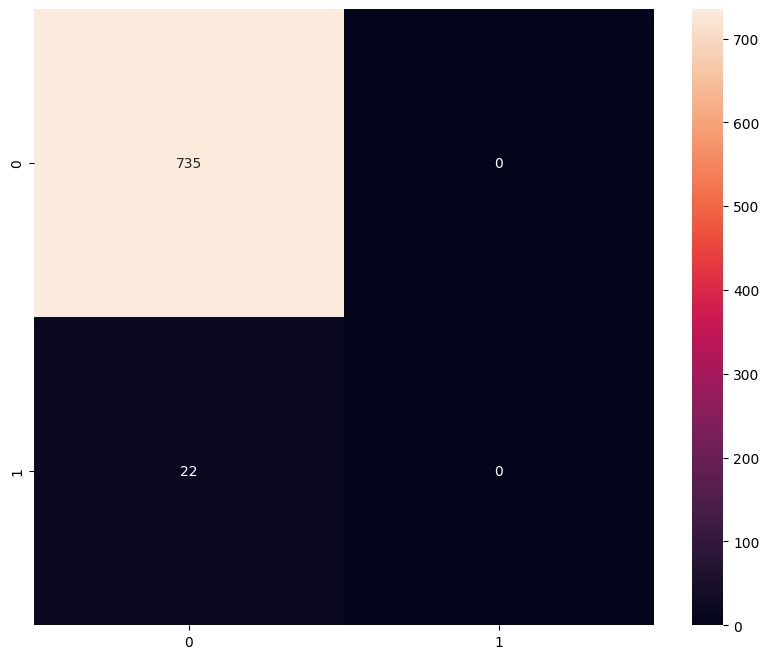

In [124]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm)

plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True ,fmt='g')

### **Plot the Difference in Results**

In [125]:
import plotly.graph_objects as go

X_test_len = []
for i in range(0, len(X_test)):
    X_test_len.append(i + 1)

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = X_test_len,
        y = y_test,
        mode = 'markers+lines',
        name = 'Test Dataset',
    ))

fig.add_trace(
    go.Scatter(
        x = X_test_len,
        y = y_pred,
        mode = 'markers+lines',
        name = 'Predicted Dataset'
    ))

fig.update_layout(
    title = "Comparing Y Test Versus Y Predicted",
    xaxis_title = "Patient",
    yaxis_title = "Stroke Identification",
    legend_title = "Output Datasets",
    font=dict(
        family = "Times New Roman, monospace",
        size = 15,
        color = "RebeccaPurple"
    )
)

fig.show()